## Machine Learning on Wine Data

- ### data load

In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', \
              'Ash', 'Alcalinity of ash', 'Magnesium', \
              'Total phenols', 'Flavanoids', \
              'Nonflavanoid phenols', 'Proanthocyanins', \
              'Color intensity', 'Hue', \
              'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.dtypes.reset_index()

,index,0
0,Class label,int64
1,Alcohol,float64
2,Malic acid,float64
3,Ash,float64
4,Alcalinity of ash,float64
5,Magnesium,int64
6,Total phenols,float64
7,Flavanoids,float64
8,Nonflavanoid phenols,float64
9,Proanthocyanins,float64


In [5]:
print(df.shape)
df['Class label'].unique()

(178, 14)


array([1, 2, 3])

- ### data preprocessing

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [131]:
x, y = df.iloc[:,1:].values, df.iloc[:,0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, \
                                                    test_size=.3, \
                                                    random_state=0)
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

- ### feature selection

In [230]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (10,8)
import seaborn as sns; sns.set(style='whitegrid', font_scale=1.2, \
                               palette='Set2')

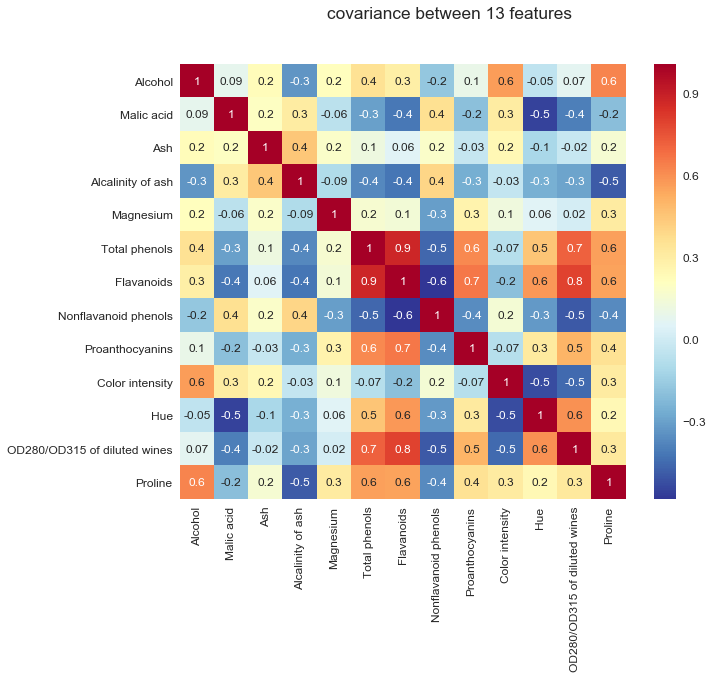

In [231]:
cova = np.cov(x_train_sc.T)
plt.figure()
sns.heatmap(cova, fmt='.1g', cmap='RdYlBu_r', \
            annot=True, annot_kws=dict(size=12), \
            xticklabels=df.columns.values[1:], \
            yticklabels=df.columns.values[1:])
plt.suptitle('covariance between %s features' % len(df.columns.values[1:]))
plt.show()

**PCA** is an <u>unsupervised</u> method, which means that information about the class labels is ignored. Plot shows feature importance using Random Forests, but PCA is an <u>unsupervised</u> method, which means that information about the class labels is ignored. Whereas a Random Forest uses the class membership information to compute the node impurities, variance measures the spread of values along a feature axis.

In [170]:
egvals, egvecs = np.linalg.eig(cova)
print('eigen vectors shape: {}'.format(egvecs.shape))
ratios = [x/sum(egvals) for x in egvals]
cum_ratios = np.cumsum(ratios)
print('eigen values:\n{}'.format(cum_ratios))

eigen vectors shape: (13, 13)
eigen values:
[0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.90469374 0.92991288 0.95249469 0.96533739 0.98169076
 1.        ]


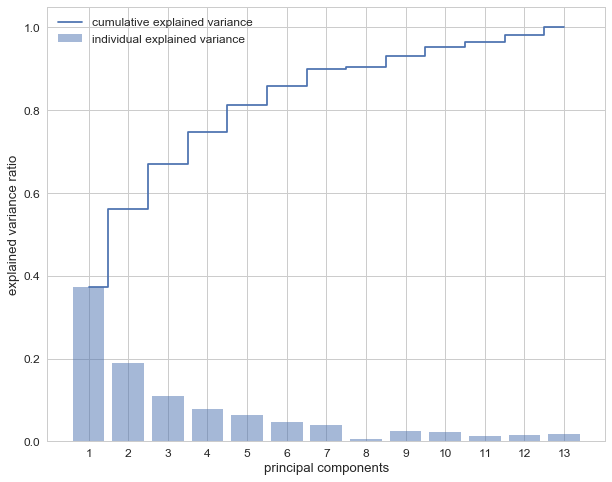

In [166]:
plt.bar(range(1,len(ratios)+1), ratios, alpha=.5, align='center', \
        label='individual explained variance')
plt.step(range(1,len(ratios)+1), cum_ratios, where='mid', \
         label='cumulative explained variance')
plt.xticks(range(1, len(ratios)+1, 1))
plt.legend(loc='best')
plt.xlabel('principal components')
plt.ylabel('explained variance ratio')
plt.show()

The top two features explained about 60% of the variance in the wine data.

Collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset. Only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later.

In [182]:
egpairs = [(egvals[i], egvecs[:,i]) for i in range(len(egvals))]
egpairs.sort(reverse=True)
egpairs

[(4.892308303273741,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048448,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044923,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450258,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

In [191]:
# created a 13×2 dimensional projection matrix W from the top two eigenvectors.
w = np.stack((egpairs[0][1], egpairs[1][1]), axis=1)
# w= np.hstack((egpairs[0][1][:, np.newaxis], egpairs[1][1][:, np.newaxis])) 
print('Matrix w:\n{}'.format(w))
w.shape

Matrix w:
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


(13, 2)

Using the projection matrix, we can now transform a sample x onto the PCA subspace obtaining x’, a now two-dimensional sample vector consisting of two new features

In [199]:
x_train_sc[0].dot(w)

array([2.59891628, 0.00484089])

Similarly, we can transform the entire 124×13 dimensional training dataset onto the two principal components by calculating the matrix dot product.

In [202]:
x_train_pca = x_train_sc.dot(w)
print(x_train_pca[:10])
x_train_pca.shape

[[ 2.59891628  0.00484089]
 [ 0.15819134 -2.26659577]
 [-2.6372337   2.66488569]
 [-2.52848449  0.51846618]
 [ 1.70922581 -0.91719459]
 [-2.83057003  0.41936129]
 [-2.82251879  1.99763147]
 [ 1.36618015  0.04639099]
 [-2.46584868 -0.07932269]
 [-2.28554906 -0.40096658]]


(124, 2)

- ### Visualize

Visualize the transformed Wine training set stored as an 124×2 dimensional matrix, in a two-dimensional scatterplot.

In [211]:
dff = pd.DataFrame(dict(x1=x_train_pca[:,0], \
                        x2=x_train_pca[:,1], \
                        yt=y_train))
dff.head()

,x1,x2,yt
0,2.598916,0.004841,1
1,0.158191,-2.266596,2
2,-2.637234,2.664886,3
3,-2.528484,0.518466,3
4,1.709226,-0.917195,2


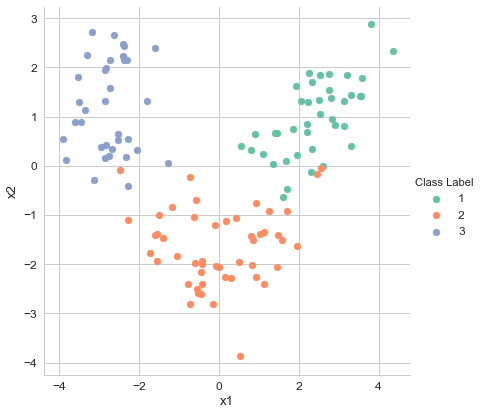

In [237]:
fg = sns.FacetGrid(data=dff, hue='yt', size=6, palette='Set2')
fg.map(plt.scatter, 'x1', 'x2').add_legend(title='Class Label')
plt.show()

We can intuitively see that a linear classifier will likely be able to separate the classes well.